## What are the advantages and disadvantages of k-fold cross validation relative to Single Split Validation set approach?

One disadvatage of the Single Split validation set approach relative to k-fold cross-validation is the validation estimate of the test error rate can be highly variable. Another disadvantage of the Single Slit validation is that only a subset of the observations are used to fit the model, so this could lead to an overestimation of the test error rate for the model's entire data set.









 ## What are the advantages and disadvantages of k-fold cross validation relative to LOOCV?

LOOCV has less bias compared to k-fold cross validation. Also, LOOCV uses all the data set instead of the train data set, so the data is not shaken up enough and can produce higher variance then the k-fold cross validation. LOOCV will also compute the same results using the same split value, whereas the k-fold cross will produce different ones because it is using a the train data set which uses different values everytime it is computed. 




## The Pros and Cons of bootstrapping 

Pros:

Simple to apply bootstrapping to complex data.

Since bootstrapping does not require distributional assumptions, it can provide more accurate inferences to the data.

Bootstrapping is straightforward way to derive the estimates of standard errors and confidence intervals

Cons:

Bootstrap sampling can only tell the person things about the orginal data set.

Bootstrapping does not perform bias corrections when computed



## Set up

In [ ]:
install.packages("ISLR")
library(ISLR)
library(boot)
library(tidyverse)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Uploading the data from my computer 

In [ ]:
url <- 'https://raw.githubusercontent.com/csanford2020/website_delete/main/california_housing_test.csv'
train_df <- read_csv(url)
sum(train_df)


Rows: 3000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): longitude, latitude, housing_median_age, total_rooms, total_bedroom...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 632451641

## Cross Validation for housing_median_age and total_bedrooms

In [ ]:
set.seed(1)
head(train_df)
dim(train_df)
train <- sample(393,196)
head(train)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-122.05,37.37,27,3885,661,1537,606,6.6085,344700
-118.30,34.26,43,1510,310,809,277,3.5990,176500
-117.81,33.78,27,3589,507,1484,495,5.7934,270500
-118.36,33.82,28,67,15,49,11,6.1359,330000
-119.67,36.33,19,1241,244,850,237,2.9375,81700
-119.56,36.51,37,1018,213,663,204,1.6635,67000


[1] 3000    9

[1] 324 167 129 299 270 187

In [ ]:
attach(train_df)
lm.fit <- lm(housing_median_age~total_bedrooms, data = train_df, subset = train)
lm.fit

The following object is masked from package:tidyr:

    population





Call:
lm(formula = housing_median_age ~ total_bedrooms, data = train_df, 
    subset = train)

Coefficients:
   (Intercept)  total_bedrooms  
     33.934960       -0.009179  


In [ ]:
mean((housing_median_age - predict(lm.fit, train_df))[-train]^2)

[1] 142.2533

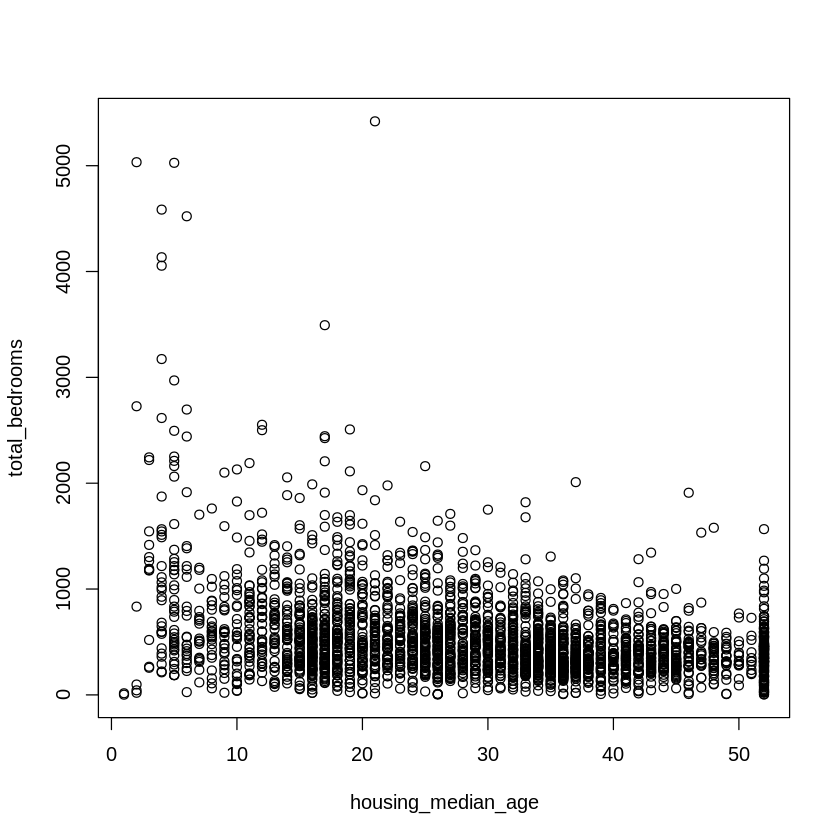

In [ ]:
plot(housing_median_age, total_bedrooms)

In [ ]:
n=2
set.seed(n)
train <- sample(393,196)
attach(train_df)
lm.fit <- lm(housing_median_age~total_bedrooms, data = train_df, subset = train)
lm.fit.poly <- lm(housing_median_age~poly(total_bedrooms,2), data = train_df, subset = train)
lm.fit.poly

The following objects are masked from train_df (pos = 3):

    households, housing_median_age, latitude, longitude,
    median_house_value, median_income, population, total_bedrooms,
    total_rooms


The following object is masked from package:tidyr:

    population





Call:
lm(formula = housing_median_age ~ poly(total_bedrooms, 2), data = train_df, 
    subset = train)

Coefficients:
             (Intercept)  poly(total_bedrooms, 2)1  poly(total_bedrooms, 2)2  
                   28.93                   -189.31                     44.25  


## K-Cross Validation with k= 10 for housing_median_age and total_bedrooms

In [ ]:
K=10
cv.error.10 <- rep(0,5)
degree <- 1:5
for(d in degree){
  glm.fit <- glm(	housing_median_age~poly(total_bedrooms,d), data = train_df)
  cv.error.10[d] <- cv.glm(Auto, glm.fit, K = K)$delta[1]
}
cv.error.10

Warning message:
“'newdata' had 38 rows but variables found have 3000 rows”
Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 39 rows but variables found have 3000 rows”
Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 39 rows but variables found have 3000 rows”
Warning message in y - yhat:
“longer object length is not a multiple of shorter object length”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 40 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 38 rows but variables found have 3000 rows”
Warning message in y - yhat

[1] 161.3661 162.4011 164.3454 163.3649 164.1166

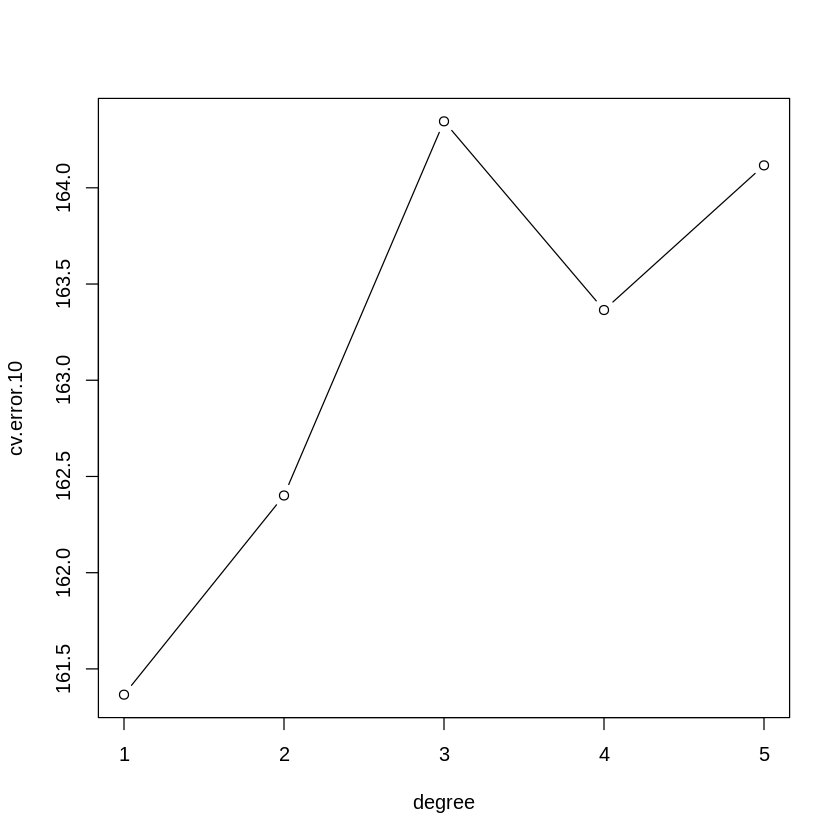

In [ ]:
plot(degree, cv.error.10, type = "b")

## K-cross validation with k=100 for housing_median_age and total_bedrooms

In [ ]:
K=100
cv.error.100 <- rep(0,5)
degree <- 1:5
for(d in degree){
  glm.fit <- glm(	housing_median_age~poly(total_bedrooms,d), data = train_df)
  cv.error.100[d] <- cv.glm(Auto, glm.fit, K = K)$delta[1]
}
cv.error.100

Warning message in cv.glm(Auto, glm.fit, K = K):
“'K' has been set to 98.000000”
Warning message:
“'newdata' had 4 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 4 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 4 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 4 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 4 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 4 rows but variables found have 3000 rows”
Warning message:
“'newdata' had 392 rows but variables found have 3000 rows”
Warning

[1] 162.1113 163.3118 163.4385 163.7786 164.6228

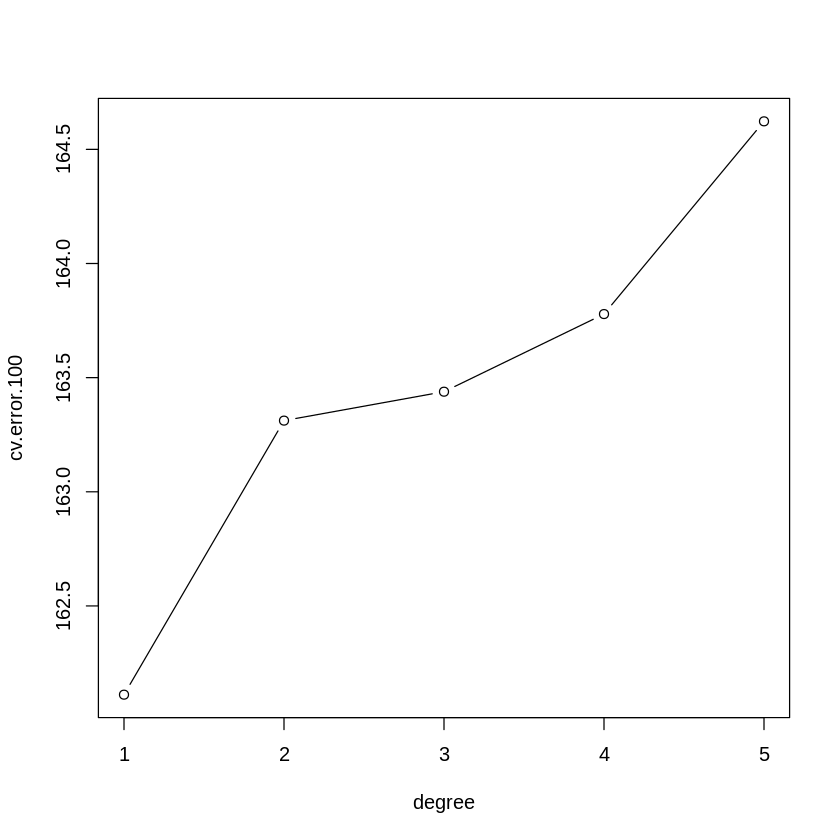

In [ ]:
plot(degree, cv.error.100, type = "b")

## bootstrap validation for housing_median_age and total_bedrooms

In [ ]:
boot.fn <- function(data, index){
  return(coef(lm(housing_median_age~total_bedrooms, data= train_df, subset=index)))
}

In [ ]:
boot.fn(Auto, 1:392)

(Intercept) total_bedrooms 
   33.74131519    -0.00877792

In [ ]:
set.seed(1)
boot.fn(Auto,sample(392, 392, replace=T))

(Intercept) total_bedrooms 
   32.71347238    -0.00801323

In [ ]:
boot.out <- boot(train_df, boot.fn, 1000)

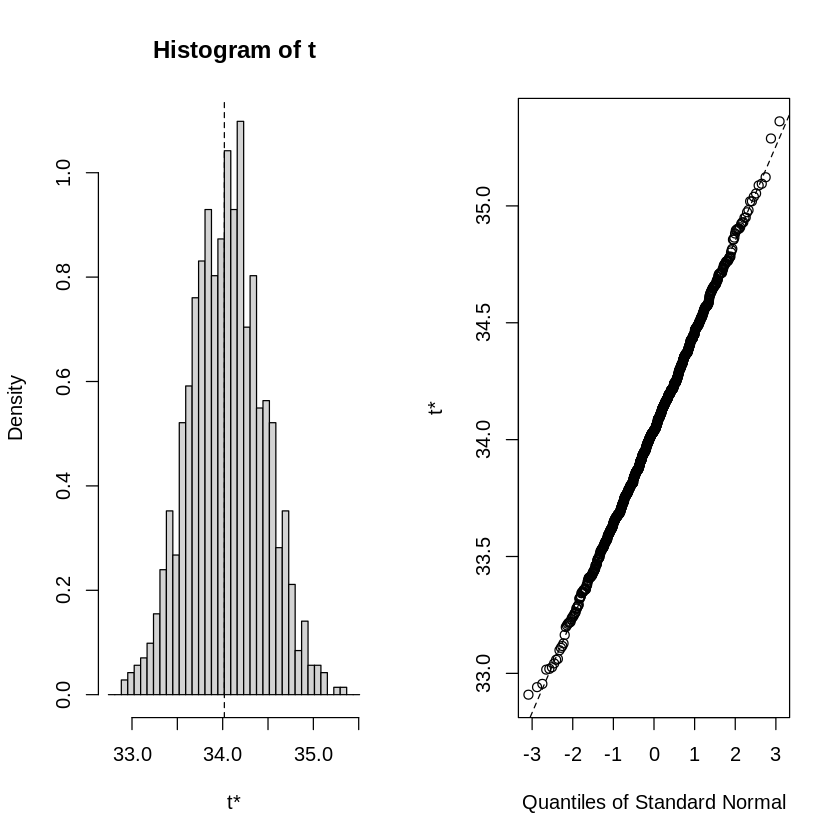

In [ ]:
plot(boot.out)

## K-cross validation with k= 10 for median_income and median_house_value

In [ ]:
K=10
cv.error.010 <- rep(0,5)
degree <- 1:5
for(d in degree){
  glm.fit <- glm(median_income~poly(median_house_value,d), data = train_df)
  cv.error.010[d] <- cv.glm(train_df, glm.fit, K = K)$delta[1]
}
cv.error.010

[1] 1.887247 1.885550 1.884949 1.882779 1.870109

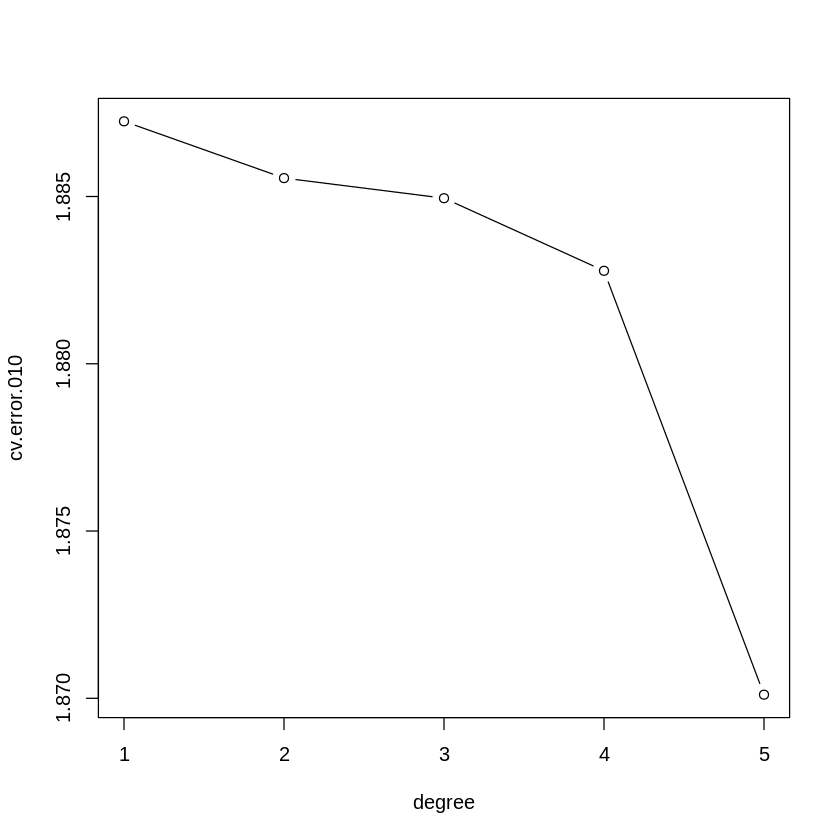

In [ ]:
plot(degree, cv.error.010, type = "b")

## K-cross validation with k= 100 for median_income and median_house_value

In [ ]:
K=100
cv.error.0100 <- rep(0,5)
degree <- 1:5
for(d in degree){
  glm.fit <- glm(median_income~poly(median_house_value,d), data = train_df)
  cv.error.0100[d] <- cv.glm(train_df, glm.fit, K = K)$delta[1]
}
cv.error.0100

[1] 1.886714 1.888862 1.879204 1.875562 1.867531

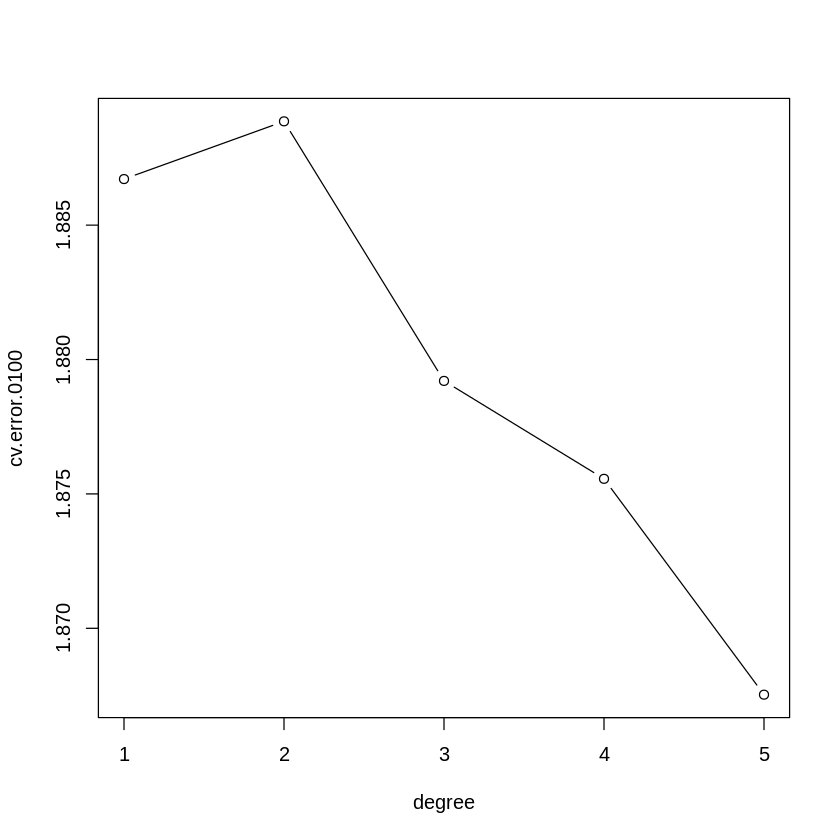

In [ ]:
plot(degree, cv.error.0100, type = "b")

## bootstrap validation for median_income and median_house_value

In [ ]:
boot.fnl <- function(data, index){
  return(coef(lm(median_income~median_house_value, data=train_df, subset=index)))
}

In [ ]:
boot.fnl(train_df, 1:392)

(Intercept) median_house_value 
      1.333182e+00       1.223604e-05

In [ ]:
set.seed(1)
boot.fnl(Auto,sample(392, 392, replace=T))

(Intercept) median_house_value 
      1.362952e+00       1.255667e-05

In [ ]:
boot.outl <- boot(train_df, boot.fnl, 1000)

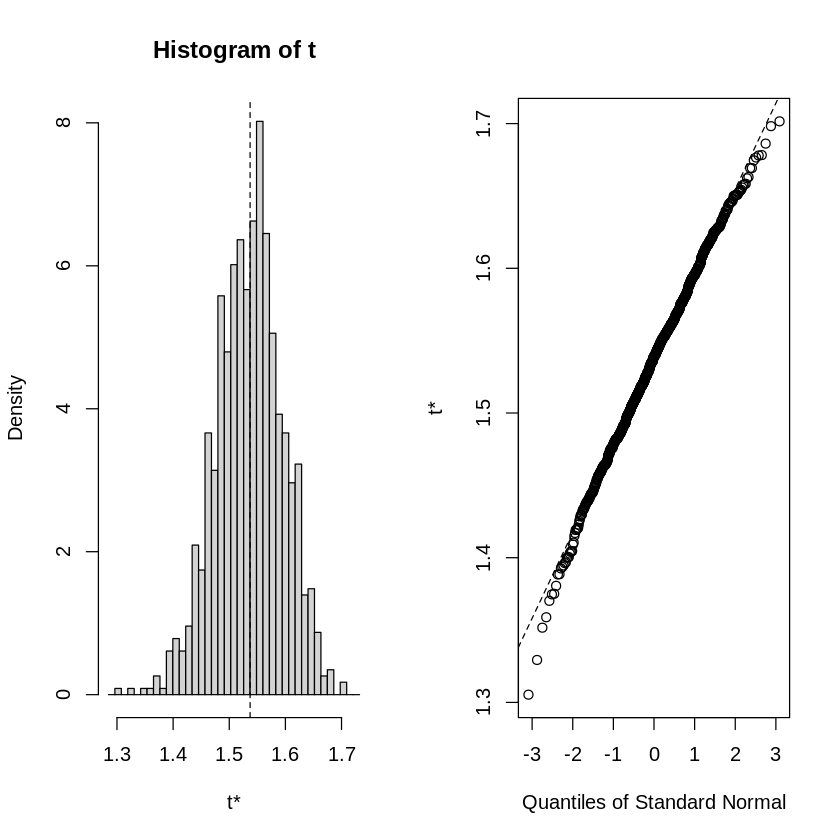

In [ ]:
plot(boot.outl)

## changing sample size for median_income and median_house_value

In [ ]:
set.seed(1)
head(train_df)
dim(train_df)
train1 <- sample(1000,500)
head(train1)

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-122.05,37.37,27,3885,661,1537,606,6.6085,344700
-118.30,34.26,43,1510,310,809,277,3.5990,176500
-117.81,33.78,27,3589,507,1484,495,5.7934,270500
-118.36,33.82,28,67,15,49,11,6.1359,330000
-119.67,36.33,19,1241,244,850,237,2.9375,81700
-119.56,36.51,37,1018,213,663,204,1.6635,67000


[1] 3000    9

[1] 836 679 129 930 509 471

In [ ]:
K=10
cv.error.00100 <- rep(0,10)
degree <- 1:10
for(d in degree){
  glm.fit <- glm(median_income~poly(median_house_value,d), data = train_df)
  cv.error.00100[d] <- cv.glm(train_df, glm.fit, K = K)$delta[1]
}
cv.error.00100

[1] 1.889783 1.889102 1.875240 1.877166 1.864618 1.866658 1.868036 1.866854
 [9] 1.863726 1.867933

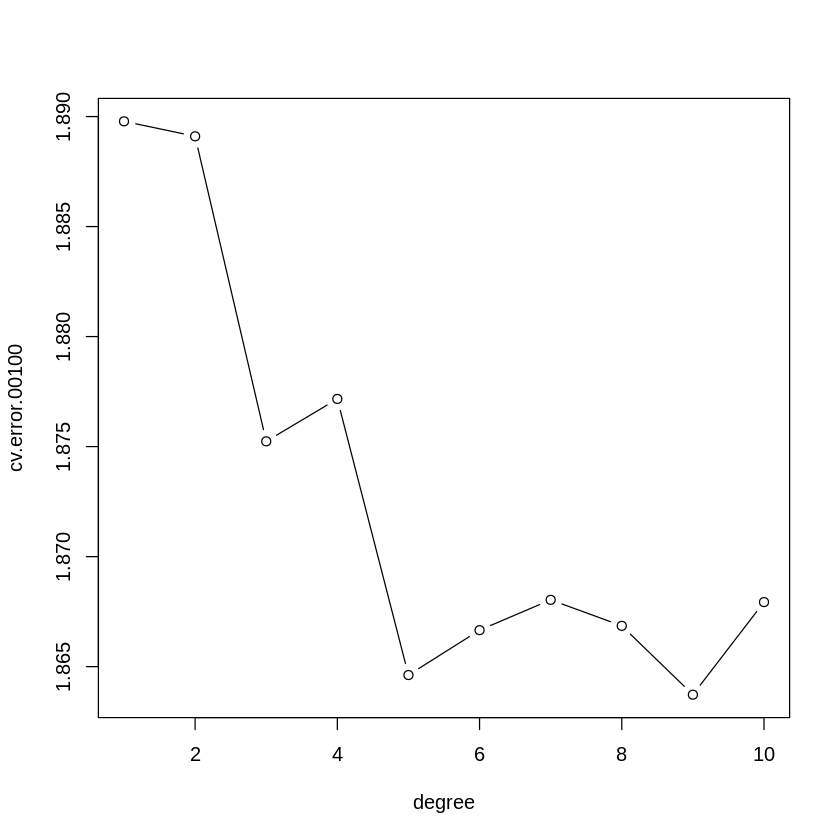

In [ ]:
plot(degree, cv.error.00100, type = "b")

In [ ]:
boot.fnl2 <- function(data, index){
  return(coef(lm(median_income~median_house_value, data=train_df, subset=index)))
}

In [ ]:
boot.fnl2(train_df, 1:500)

(Intercept) median_house_value 
      1.403734e+00       1.182196e-05

In [ ]:
set.seed(1)
boot.fnl2(Auto,sample(500, 500, replace=T))

(Intercept) median_house_value 
      1.464882e+00       1.221706e-05

In [ ]:
boot.outl2 <- boot(train_df, boot.fnl2, 1000)

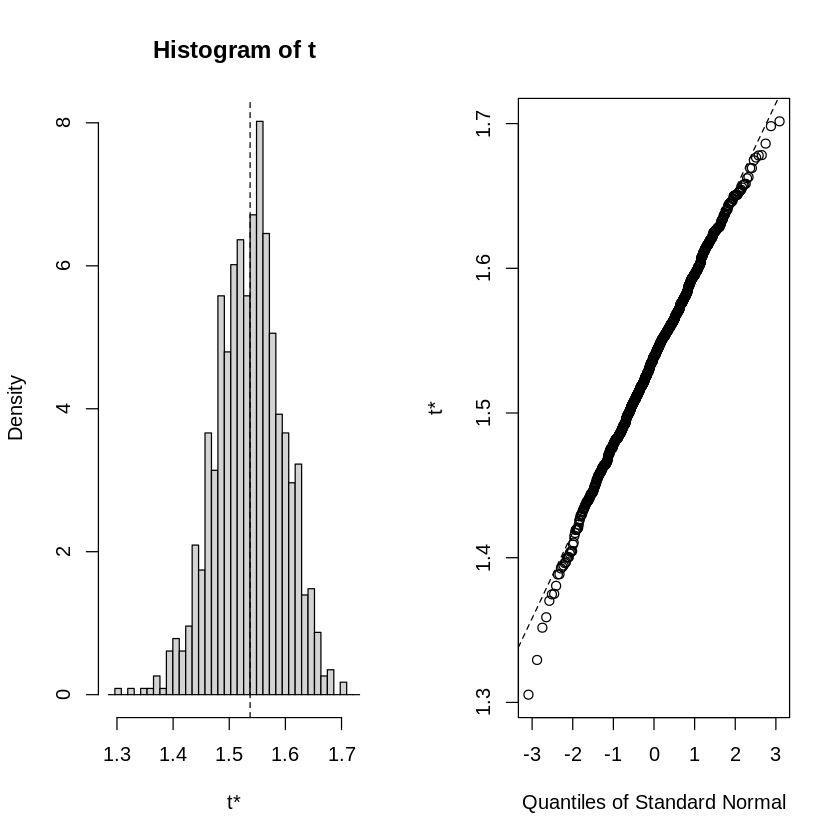

In [ ]:
plot(boot.outl2)